In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Change to the desired folder path in your Google Drive
folder_path = '/content/drive/MyDrive/NDVI (Normalized Difference Vegetation Index) Project'
os.chdir(folder_path)


**Download EarthPY Library:**



In [ ]:
!pip install earthpy

# Python package developed to simplify the process of working with spatial data in Earth science and geospatial analysis. EarthPy is built on top of the widely used scientific Python libraries like NumPy, Matplotlib, and rasterio, and it provides easy-to-use functions and methods to analyze and visualize geospatial data.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 40.9 MB/s eta 0:00:00


Rasterio is a Python library used for reading and writing geospatial raster data. It provides a simple and efficient way to work with raster datasets, which are commonly used in Earth science, remote sensing, and geospatial analysis. Rasterio builds on top of the GDAL (Geospatial Data Abstraction Library) and Python's NumPy, making it a powerful tool for processing and analyzing geospatial data.

Reading and Writing Raster Data: Rasterio can open and read various raster data formats, such as GeoTIFF, JPEG, PNG, and more. It allows users to access raster data as NumPy arrays, making it easy to perform data manipulation and analysis.

A raster dataset is a type of geospatial data representation that divides the Earth's surface into a grid of cells or pixels. Each pixel in the raster grid represents a value, such as elevation, temperature, land cover type, or any other attribute of interest. Raster datasets are widely used in various Earth science and geospatial applications due to their ability to represent continuous and discrete phenomena over a spatial area.

Key characteristics of raster datasets:

Spatial Extent: A raster dataset covers a specific spatial extent, which defines the geographic region represented by the raster. The extent is defined by the coordinates of the top-left and bottom-right corners of the raster grid.

Resolution: The resolution of a raster dataset refers to the size of each pixel in the raster grid. It determines the level of detail or precision with which data is represented. Higher resolution means smaller pixel size and finer detail.

Coordinate Reference System (CRS): Raster datasets are georeferenced, meaning they are tied to a specific coordinate reference system (CRS). The CRS defines the spatial reference and units used to represent locations on the Earth's surface.

Data Values: Each pixel in the raster grid contains a data value representing the attribute of interest. For example, in an elevation raster, each pixel stores the elevation value for that location.

**Importing the Libraries:**

In [ ]:
import os
# The os module is a standard Python library that provides a way to interact with the operating system. In this code snippet, os is likely used to perform operations related to file and directory handling, such as listing files in a directory or changing the current working directory.
from glob import glob
# The glob function is used for finding file pathnames that match a specified pattern. It is often used for file searching and handling multiple files with similar names.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# ListedColormap is a class from the matplotlib.colors module that represents a discrete colormap. It is used for creating custom colormaps when visualizing data.
import earthpy as et
# earthpy is a Python package designed for working with geospatial data in Earth science and geospatial analysis. It provides functions and classes to read, manipulate, and visualize geospatial data. In this code snippet, the earthpy package is likely used for specific geospatial tasks.
import earthpy.spatial as es
# earthpy.spatial is a sub-module of the earthpy package that contains functions related to spatial analysis of geospatial data. It provides tools for cropping, clipping, and resampling raster datasets, among other spatial operations.
import earthpy.plot as ep
# earthpy.plot is another sub-module of the earthpy package that focuses on geospatial data visualization. It provides functions and tools to create various types of plots and maps for geospatial datasets.

- A raster dataset is like a big grid of these pixels. Each pixel in the grid holds a value that represents something about the area it covers. This value could stand for things like temperature, elevation, vegetation type, or any other information you want to know about a location on the Earth's surface.

- Think of it as if you were looking down on a map from an airplane. Instead of seeing streets and landmarks, you see a grid of colored squares, each square representing a specific piece of information about the land below.

- So, in simple terms, a raster dataset is a way of organizing and storing data about different attributes of the Earth's surface using a grid of tiny squares, kind of like a digital map made up of colorful pixels.

- A TIF image, also known as a TIFF image, stands for Tagged Image File Format. It is a popular and widely used file format for storing and exchanging raster graphics images. TIF images can contain both bitmap and vector images, and they can support a variety of color depths, compression methods, and metadata.

Here are some key features and characteristics of TIF images:

- Raster Format: TIF images are primarily used to store raster graphics, which means they are composed of a grid of individual pixels. Each pixel in the grid has a specific color value, which collectively forms the image.

- Lossless Compression: TIF images typically use lossless compression, which means that they can be compressed without any loss of image quality. This makes TIF images suitable for storing high-quality images without sacrificing visual fidelity.

- Color Depth: TIF images can support various color depths, including grayscale, RGB (Red-Green-Blue), and CMYK (Cyan-Magenta-Yellow-Black). This flexibility allows TIF images to represent a wide range of colors and tones.

- Metadata: TIF files can store a variety of metadata, including information about the image, such as author, copyright, creation date, and more. This metadata is stored in a tag structure within the file.

- Layer Support: TIF files can also support layers, making them suitable for applications that require multiple layers of image data, such as image editing software.

- Platform Independence: TIF files are designed to be platform-independent, meaning they can be read and written by different software applications on various operating systems.

- Widely Supported: TIF is a widely supported file format, and many image editing, graphic design, and GIS (Geographic Information Systems) software can open, manipulate, and save TIF images.





<hr><hr><hr>


In [ ]:
!pip install rasterio

## Code for analysing captured Images

---



In [ ]:
import rasterio

# Path to your TIFF image
tiff_path = "/content/drive/MyDrive/NDVI (Normalized Difference Vegetation Index) Project/TIFF Images/Image 1/IMG_0189_1.tif"

# Open the TIFF image
with rasterio.open(tiff_path) as src:
    # Check if CRS is present
    if src.crs:
        print("CRS is present:", src.crs)
    else:
        print("CRS is not present")

    # Check if transform (geotransform) is present
    if src.transform:
        print("Transform is present:", src.transform)
    else:
        print("Transform is not present")

    # Check if number of bands is present
    if src.count:
        print("Number of bands:", src.count)
    else:
        print("Number of bands is not present")

    # Check if nodata value is present
    if src.nodata:
        print("Nodata value:", src.nodata)
    else:
        print("Nodata value is not present")

    # Check band order
    band_order = src.indexes
    print("Band order:", band_order)

    # Get data type
    data_type = src.dtypes[0]  # Assumes all bands have the same data type
    print("Data type:", data_type)

    # Get geotransform
    geotransform = src.transform
    print("Geotransform:", geotransform)


CRS is not present
Transform is present: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Number of bands: 1
Nodata value is not present
Band order: (1,)
Data type: uint16
Geotransform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
os.listdir('/content/drive/MyDrive/NDVI (Normalized Difference Vegetation Index) Project')

['ndvi-repo',
 'TIFF Images',
 'NDVI Project - Website Using Python.zip',
 'images',
 'Final Project Code ',
 '.ipynb_checkpoints',
 'Enhancements Suggested',
 'Research Paper',
 'Enhanced Tree Vegetation Mapping from Drone Imagery using NDVI (Original Project Code).ipynb',
 'IMG_0190_4.tif',
 'IMG_0190_5.tif',
 'flagged',
 'temp_upload_band_4',
 'temp_save_folder']

In [ ]:
#import bands as separate 1 band raster
band4 = rasterio.open('/content/drive/MyDrive/NDVI (Normalized Difference Vegetation Index) Project/TIFF Images/Image 1/IMG_0189_4.tif') #red
band5 = rasterio.open('/content/drive/MyDrive/NDVI (Normalized Difference Vegetation Index) Project/TIFF Images/Image 1/IMG_0189_5.tif') #nir

In [ ]:
from rasterio import plot

#number of raster rows
print(band4.height)
#number of raster columns
print(band4.width)

960
1280


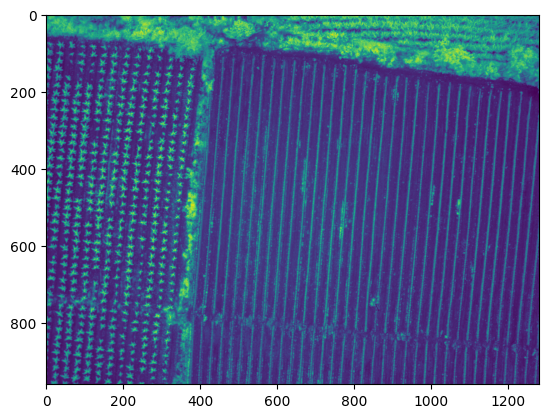

<Axes: >

In [ ]:
#plot band
plot.show(band4)

In [ ]:
#number of raster rows
print(band5.height)
#number of raster columns
print(band5.width)

960
1280


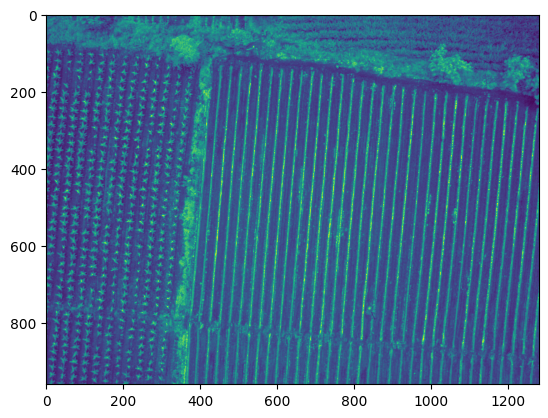

<Axes: >

In [ ]:
#plot band
plot.show(band5)

In [ ]:
print("Band 4 Details : \n")

print(band4.shape, "\n")

# type of raster byte
print(band4.dtypes[0], "\n")

# raster sytem of reference
print(band4.crs, "\n")

# raster transform parameters
print(band4.transform, "\n")

# raster values as matrix array
print(band4.read(1))


Band 4 Details : 

(960, 1280) 

uint16 

None 

| 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00| 

[[35440 38400 41232 ... 42096 43376 39360]
 [38000 40016 41952 ... 42576 42240 38880]
 [36864 39152 42448 ... 38720 38368 37632]
 ...
 [13808 12272 12448 ... 13904 14640 16320]
 [15184 13216 12704 ... 14272 15184 15952]
 [14928 12560 12384 ... 14496 14592 14640]]


In [ ]:
print("Band 5 Details : \n")

print(band5.shape, "\n")

# type of raster byte
print(band5.dtypes[0], "\n")

# raster sytem of reference
print(band5.crs, "\n")

# raster transform parameters
print(band5.transform, "\n")

# raster values as matrix array
print(band5.read(1))

Band 5 Details : 

(960, 1280) 

uint16 

None 

| 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00| 

[[30496 27888 27488 ... 17328 13776 12576]
 [26944 24384 23760 ... 17024 13584 14416]
 [27584 25024 24992 ... 14192 14352 16080]
 ...
 [13792 14944 15584 ... 24208 23648 20096]
 [15200 14960 15312 ... 22336 21200 20320]
 [16832 14688 15872 ... 20144 21072 18736]]


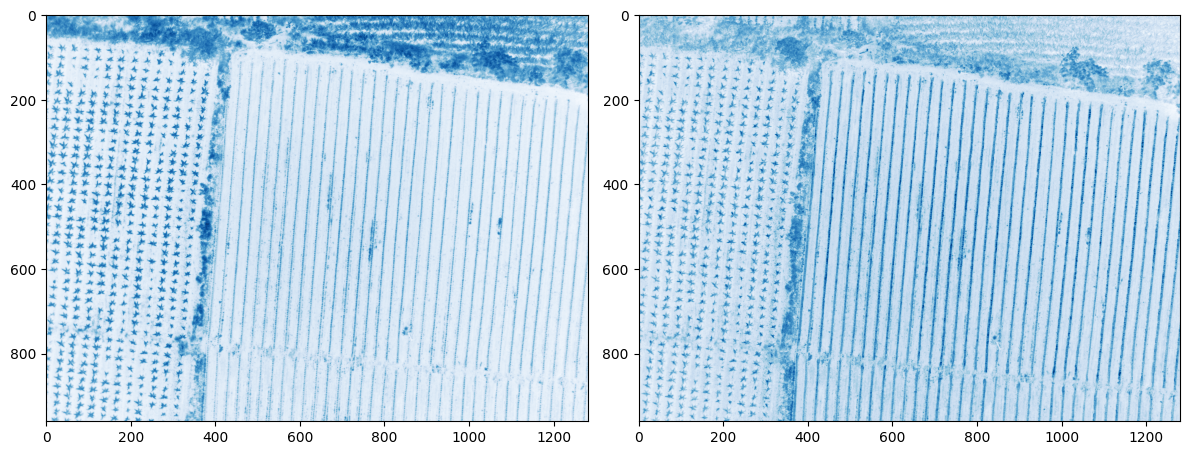

In [ ]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

# The rasterio.plot.show function, by default, uses the pixel coordinates of the raster data for tick marks and labels on the x and y axes. This means that each tick mark corresponds to a specific row or column of the raster data.

<hr><hr><hr>

## Calculating NDVI

In [ ]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

In [ ]:
red

array([[35440., 38400., 41232., ..., 42096., 43376., 39360.],
       [38000., 40016., 41952., ..., 42576., 42240., 38880.],
       [36864., 39152., 42448., ..., 38720., 38368., 37632.],
       ...,
       [13808., 12272., 12448., ..., 13904., 14640., 16320.],
       [15184., 13216., 12704., ..., 14272., 15184., 15952.],
       [14928., 12560., 12384., ..., 14496., 14592., 14640.]])

In [ ]:
nir

array([[30496., 27888., 27488., ..., 17328., 13776., 12576.],
       [26944., 24384., 23760., ..., 17024., 13584., 14416.],
       [27584., 25024., 24992., ..., 14192., 14352., 16080.],
       ...,
       [13792., 14944., 15584., ..., 24208., 23648., 20096.],
       [15200., 14960., 15312., ..., 22336., 21200., 20320.],
       [16832., 14688., 15872., ..., 20144., 21072., 18736.]])

In [ ]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0.,
    0,
    (nir-red)/(nir+red))

ndvi[:8,:8]

# ndvi = np.where(...): Uses the NumPy where function to calculate the NDVI. The where function applies a condition element-wise to arrays and returns values based on the condition.

# (nir + red) == 0.0: Creates a boolean mask where the condition is True for cells where the sum of NIR and red values is equal to 0.0.

# 0: Represents the value to assign to cells where the condition is True (i.e., where the sum of NIR and red is 0). In this case, you're setting NDVI values to 0 for these cells.

# (nir - red) / (nir + red): Represents the formula for calculating NDVI for the rest of the cells. NDVI is calculated as the difference between NIR and red values divided by the sum of NIR and red values.

# ndvi[:5, :5]: This is a NumPy array slicing operation that extracts the first 5 rows and first 5 columns of the calculated NDVI array. It allows you to view a subset of the NDVI values for quick inspection.

array([[-0.0749818 , -0.15858074, -0.2       , -0.18669417, -0.07999039,
         0.01500808, -0.0027894 , -0.04120946],
       [-0.17023898, -0.24273292, -0.27684441, -0.28492462, -0.22201139,
        -0.15164624, -0.04028489, -0.08258187],
       [-0.14399206, -0.2201446 , -0.25883749, -0.22995147, -0.26802657,
        -0.2113802 , -0.12425186, -0.0326521 ],
       [-0.12981455, -0.17094222, -0.18585267, -0.16362126, -0.26692678,
        -0.1638646 , -0.0585702 , -0.08002575],
       [-0.1011625 , -0.03015412, -0.09742687, -0.15392896, -0.11639655,
        -0.12174494, -0.12073772, -0.12508129],
       [-0.14812862, -0.03203312, -0.03215303, -0.14153717, -0.08906799,
        -0.14649407, -0.13976298, -0.23347826],
       [-0.12284264, -0.02014324,  0.01658816, -0.11771377, -0.22487346,
        -0.24316682, -0.21742958, -0.21290863],
       [-0.02653364, -0.02656384, -0.11362065, -0.17273394, -0.18968059,
        -0.2447228 , -0.23175966, -0.22929024]])

In [ ]:
average_ndvi = np.mean(ndvi)
print("Average NDVI:", average_ndvi)


Average NDVI: 0.0777502217826766


## NDVI (Normalized Difference Vegetation Index) is a standardized index that quantifies the presence and health of vegetation in a specific area based on the reflectance of different spectral bands, usually near-infrared (NIR) and red.

# The NDVI values range from -1 to +1, where:

- Negative Values (-1 to 0): These values typically indicate non-vegetated or barren surfaces, such as water bodies, barren land, or built-up areas.

- Low Positive Values (0 to 0.2): These values generally correspond to sparse or stressed vegetation, such as shrubs or grasslands.

- Moderate Positive Values (0.2 to 0.5): These values typically represent healthy or moderately dense vegetation, such as forests, croplands, and grasslands.

- High Positive Values (0.5 to 1): These values indicate very healthy and dense vegetation, such as dense forests or lush vegetation.

- In your case, an NDVI value of 0.077 indicates that the average vegetation health in the image is relatively low. This could imply that the image contains areas with sparse or stressed vegetation, such as grasslands with limited growth or possibly areas with non-vegetated surfaces.

In [ ]:
# Display NDVI statistics
print("NDVI Minimum:", np.min(ndvi))
print("NDVI Maximum:", np.max(ndvi))
print("NDVI Mean:", np.mean(ndvi))
print("NDVI Standard Deviation:", np.std(ndvi))

NDVI Minimum: -0.6678760814959531
NDVI Maximum: 0.6820702402957486
NDVI Mean: 0.0777502217826766
NDVI Standard Deviation: 0.216484280968497


<hr><hr><hr>


# Function that takes the paths of the band 4 & band 5 images & returns the average NDVI value for the entire image of the region

In [ ]:
import numpy as np
import rasterio

def calculate_ndvi(band4_path, band5_path):
    # Open band 4 (Red) and band 5 (NIR) TIFF images
    with rasterio.open(band4_path) as band4:
        red = band4.read(1).astype('float64')

    with rasterio.open(band5_path) as band5:
        nir = band5.read(1).astype('float64')

    # Calculate NDVI
    ndvi = np.where(
        (nir + red) == 0.0,
        0.0,
        (nir - red) / (nir + red)
    )

    # Calculate and print NDVI statistics
    average_ndvi = np.mean(ndvi)
    min_ndvi = np.min(ndvi)
    max_ndvi = np.max(ndvi)
    print("\n")
    print("Average NDVI:", average_ndvi)
    print("\n")
    print("NDVI Minimum:", min_ndvi)
    print("\n")
    print("NDVI Maximum:", max_ndvi)
    print("\n")

# Example usage of the function
band4_path = '/content/drive/MyDrive/NDVI (Normalized Difference Vegetation Index) Project/TIFF Images/Image 2/IMG_0190_4.tif'
band5_path = '/content/drive/MyDrive/NDVI (Normalized Difference Vegetation Index) Project/TIFF Images/Image 2/IMG_0190_5.tif'

calculate_ndvi(band4_path, band5_path)




Average NDVI: 0.03302939657398518


NDVI Minimum: -0.6512641673931997


NDVI Maximum: 0.6663275686673449




<hr><hr><hr>

# Function that allows the user to upload the images of the band 4 & band 5 & then utilizes those uploaded images which are saved in a folder on the google drive to calculate the NDVI value of the entire image

In [ ]:
import numpy as np
import rasterio
from google.colab import files
import os

def calculate_and_upload_ndvi(upload_folder, save_folder):
    # Find the next available folder number
    folder_number = 1
    while os.path.exists(os.path.join(upload_folder, f"User Upload {folder_number}")):
        folder_number += 1

    # Create a new numbered folder
    new_folder = os.path.join(upload_folder, f"User Upload {folder_number}")
    os.makedirs(new_folder, exist_ok=True)

    # Upload band 4 (Red) and band 5 (NIR) images
    print("Upload band 4 (Red) image:")
    band4_upload = files.upload()
    band4_filename = list(band4_upload.keys())[0]
    band4_path = os.path.join(new_folder, band4_filename)

    print("Upload band 5 (NIR) image:")
    band5_upload = files.upload()
    band5_filename = list(band5_upload.keys())[0]
    band5_path = os.path.join(new_folder, band5_filename)

    # Save uploaded images to the new folder
    with open(os.path.join(new_folder, band4_filename), 'wb') as f:
        f.write(band4_upload[band4_filename])

    with open(os.path.join(new_folder, band5_filename), 'wb') as f:
        f.write(band5_upload[band5_filename])

    # Open band 4 (Red) and band 5 (NIR) TIFF images
    try:
        with rasterio.open(band4_path) as band4:
            red = band4.read(1).astype('float64')
    except Exception as e:
        print(f"Error opening {band4_path}: {e}")
        return

    try:
        with rasterio.open(band5_path) as band5:
            nir = band5.read(1).astype('float64')
    except Exception as e:
        print(f"Error opening {band5_path}: {e}")
        return

    # Calculate NDVI
    ndvi = np.where(
        (nir + red) == 0.0,
        0.0,
        (nir - red) / (nir + red)
    )

    # Calculate and print NDVI statistics
    average_ndvi = np.mean(ndvi)
    min_ndvi = np.min(ndvi)
    max_ndvi = np.max(ndvi)

    # ndvi_statistics = {
    #     "Average NDVI": average_ndvi,
    #     "NDVI Minimum": min_ndvi,
    #     "NDVI Maximum": max_ndvi
    # }

    # return ndvi_statistics

    # return average_ndvi
    print("\n")
    print("Average NDVI:", average_ndvi)
    print("\n")
    print("NDVI Minimum:", min_ndvi)
    print("\n")
    print("NDVI Maximum:", max_ndvi)

# Example usage of the function
upload_folder = '/content/drive/MyDrive/NDVI_Project/User_Uploaded_Images'
save_folder = '/content/drive/MyDrive/NDVI_Project/Saved_Images'
calculate_and_upload_ndvi(upload_folder, save_folder)


Upload band 4 (Red) image:


Saving IMG_0191_4.tif to IMG_0191_4.tif
Upload band 5 (NIR) image:


Saving IMG_0191_5.tif to IMG_0191_5.tif


Average NDVI: -0.015549201870656072


NDVI Minimum: -0.673224043715847


NDVI Maximum: 0.638


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<hr><hr><hr>


## Analysing the NDVI values using visualizations

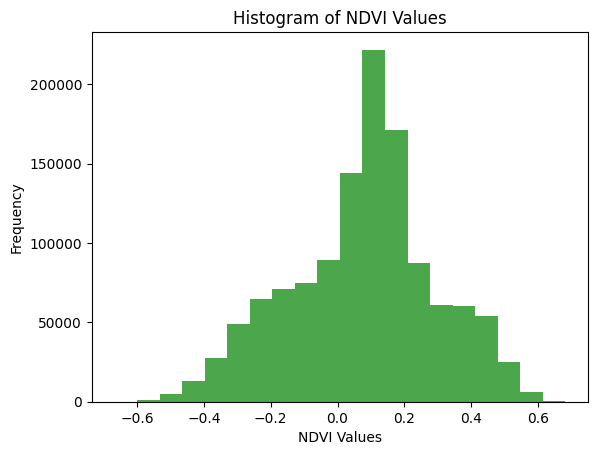

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of NDVI values
plt.hist(ndvi.ravel(), bins=20, color='green', alpha=0.7)
plt.xlabel('NDVI Values')
plt.ylabel('Frequency')
plt.title('Histogram of NDVI Values')
plt.show()

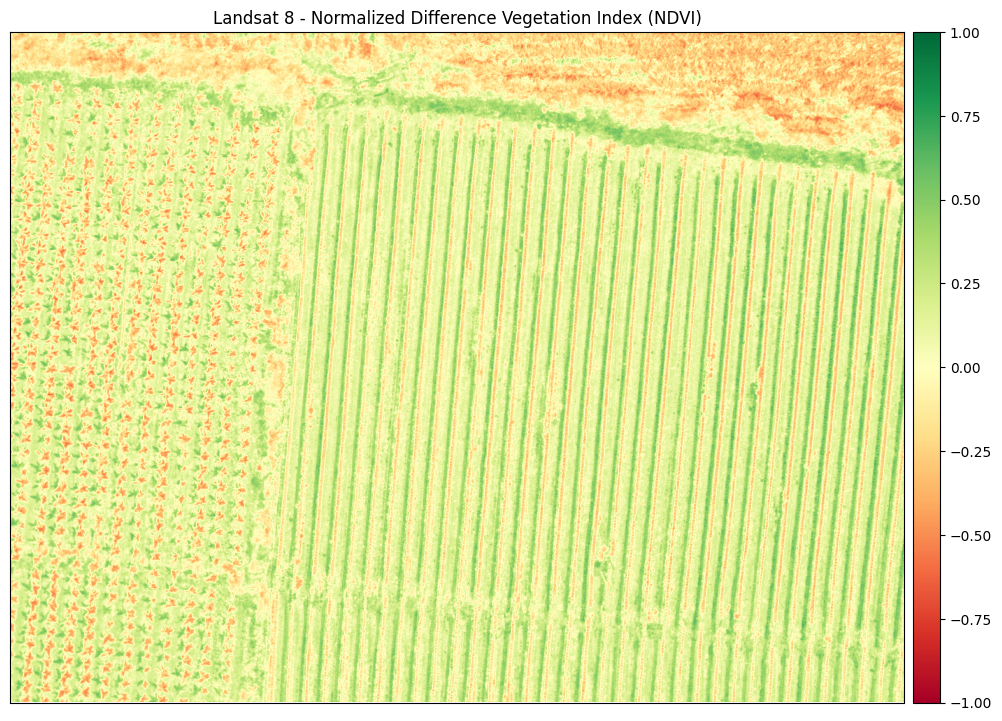

<Axes: title={'center': 'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [ ]:
titles = ["Normalized Difference Vegetation Index (NDVI)"]

# This line defines a list called titles containing a single string element, which is the title you want to display for the plot.

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

# This line uses the ep.plot_bands() function from the earthpy.plot module to create the plot of NDVI data.
# ndvi: The NDVI array that you want to visualize.
# cmap="RdYlGn": Specifies the colormap to use for coloring the NDVI values. Here, it's using the "Red-Yellow-Green" colormap.
# cols=1: Specifies that you want to display the bands in a single column layout.
# title=titles: Sets the title of the plot using the titles list you defined earlier.
# vmin=-1 and vmax=1: These parameters set the color scale limits for the plot. NDVI values typically range from -1 to 1, so this ensures that the color map is applied correctly to the data.

<hr><hr><hr>

<hr><hr><hr>

## Code to get the NDVI for a specific region from the image

In [ ]:


import numpy as np
import rasterio

# Load band 4 (Red) and band 5 (NIR) from TIFF images
band4_path = "/path/to/your/band4/image.tif"
band5_path = "/path/to/your/band5/image.tif"

with rasterio.open(band4_path) as band4_src:
    band4 = band4_src.read(1)

with rasterio.open(band5_path) as band5_src:
    band5 = band5_src.read(1)

# Clip region of interest (optional) :

# Define your region of interest as a bounding box (minx, miny, maxx, maxy)
# Then clip the band data using the bounding box
minx, miny, maxx, maxy = (x_min, y_min, x_max, y_max)  # Replace with your values
clipped_band4 = band4[miny:maxy, minx:maxx]
clipped_band5 = band5[miny:maxy, minx:maxx]

# Calculate NDVI for the clipped region
ndvi = np.where(
    (clipped_band5 + clipped_band4) == 0.0,
    0.0,
    (clipped_band5 - clipped_band4) / (clipped_band5 + clipped_band4)
)

# Display NDVI statistics
print("NDVI Minimum:", np.min(ndvi))
print("NDVI Maximum:", np.max(ndvi))
print("NDVI Mean:", np.mean(ndvi))
print("NDVI Standard Deviation:", np.std(ndvi))


![Landsat 8 Band Table](https://landsat.gsfc.nasa.gov/wp-content/uploads/2021/12/BandpassesL7vL8_Jul20131-1024x611-1.jpg)


<hr><hr><hr>